In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [11]:
def image_encoder(im_array, border=5, random_seed=88, 
                  h_steps=1, 
                  v_steps=1, 
                  black_level=20, 
                  white_level=200,
                  black_variance=20,
                  white_variance=30):
    
    im_array = im_array
    border = border
    seed = random_seed
    h_steps = h_steps
    v_steps = v_steps
    random.seed(seed)
    
    for w in range(1, im_array.shape[0], h_steps):        
        for h in range(1, im_array.shape[1], v_steps):
            for c in range(im_array.shape[2]):
                intensity_b = random.randint(black_level, black_level + black_variance)
                intensity_w = random.randint(white_level, white_level + white_variance)
                if im_array[w,h,c] < 125:
                    im_array[w,h,c] = intensity_b
                else:
                    im_array[w,h,c] = intensity_w
                    
    return im_array

def magic_encoder(im_array, border=5, 
                  h_steps=1, 
                  v_steps=1,
                  shuffle = False,
                  seed = 188):
    seed = 88
    im_array = im_array
    h_steps = h_steps
    v_steps = v_steps
    random.seed(seed)
    
    
    for w in range(1, im_array.shape[0], h_steps):
        i = random.randint(0, len(magic_colors))
        #i = 0
        for h in range(1, im_array.shape[1], v_steps):
            i += 1
            if i >= len(magic_colors): 
                i = 0
            for c in range(im_array.shape[2]):
                if im_array[w,h,c] > 128:
                    im_array[w,h,c] = magic_colors[i][c]
                    
    return im_array

def img_plotter(image, display=True, fig_size=10, output_folder='encoded_img'):
    display = display
    image = image
    fig_size = fig_size
    output_folder = output_folder
    if fig_size == None:
        imgplot = plt.figure()
    else:
        imgplot = plt.figure(figsize=(fig_size,fig_size))
    imgplot = plt.axis('off')
    imgplot = plt.imshow(image)
    imgplot = plt.savefig(output_folder, pad_inches=0, bbox_inches='tight')
    

magic_colors = [[177, 228, 227], [177, 228, 227], 
                [191, 206, 214], [229, 225, 230],
                [213, 194, 216], [193, 178, 182], 
                [208, 211, 212], [190, 198, 196], 
                [199, 201, 199], [231, 186, 228]]

''' 
Pantone Colors:

317 C
5455 C
524C
435 C
441 C
420 C
250 C
663 C    
442 C Escuro    
421 C Escuro
427 C
'''

' \nPantone Colors:\n\n317 C\n5455 C\n524C\n435 C\n441 C\n420 C\n250 C\n663 C    \n442 C Escuro    \n421 C Escuro\n427 C\n'

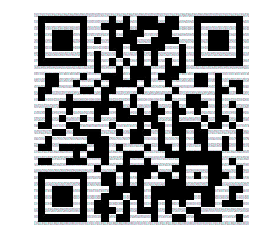

In [21]:
SRC_IMG_PATH = 'qr-files/'
DST_IMG_PATH = 'encoded-files/'

for image in os.listdir(SRC_IMG_PATH):  
    I = np.asarray(Image.open(os.path.join(SRC_IMG_PATH, image)))
    I2 = np.copy(I)
    if len(I2.shape) <  3:
        print('WARNING: Imagem {0} é 2D, skipping!'.format(image))
    else: 
        I2 = magic_encoder(I2, v_steps=1, h_steps=2)
        im2 = Image.fromarray(np.uint8(I2))
        img_plotter(im2, fig_size=None, output_folder=DST_IMG_PATH+'2x3_'+image)